In [158]:
from copy import deepcopy

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math

In [90]:
def plot_points(data, title="Bike"):
    x = data[0]
    y = data[1]
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label="Data points")
    plt.title(title)
    plt.legend()
    plt.show()

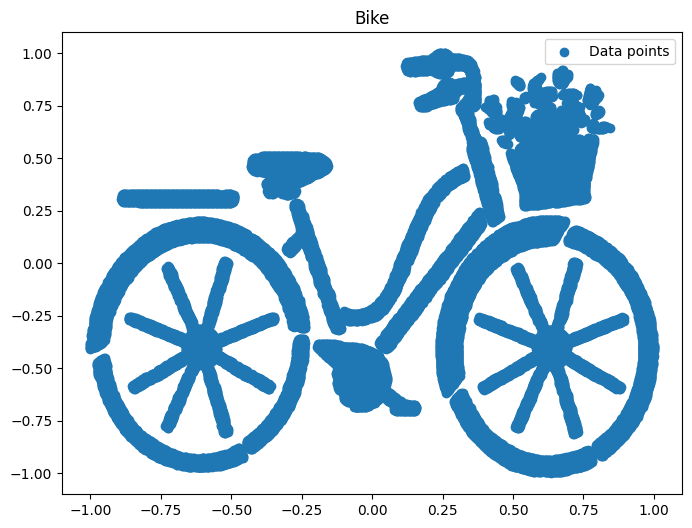

In [91]:
file_path = "bicycle.txt"

data = pd.read_csv(file_path, delimiter=" ", header=None)

x = data[0]
y = data[1]

plot_points(data)

In [92]:
T = 1000
beta_tab = np.linspace(0.0001, 0.02, T)
alpha_tab = 1 - beta_tab
alpha2_tab = np.cumprod(alpha_tab)

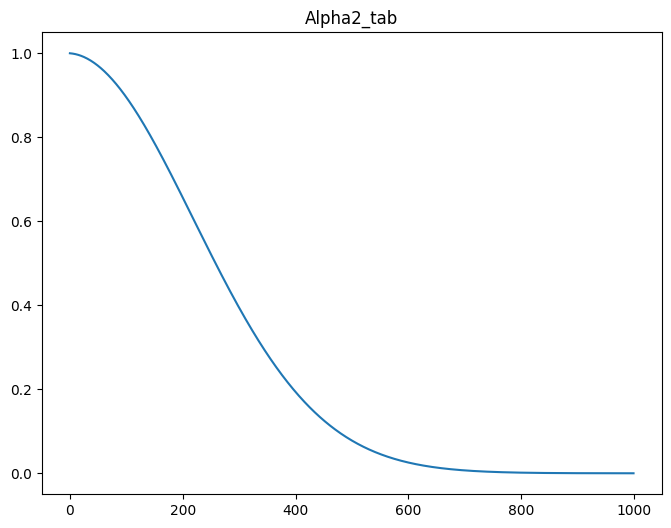

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(alpha2_tab)
plt.title("Alpha2_tab")
plt.show()

In [94]:
def sigmoidal_function(T):
    x = np.linspace(0, T, T)
    return 1 / (1 + np.exp(10 / T * (x - T/2)))

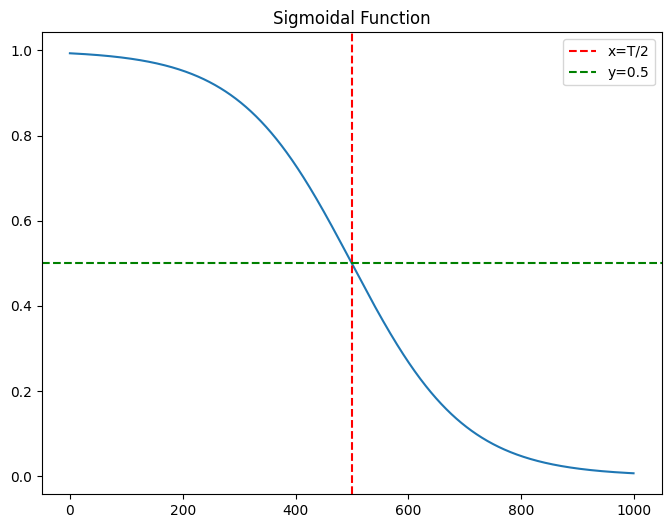

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(sigmoidal_function(T))
plt.title("Sigmoidal Function")
plt.axvline(T / 2, color="red", linestyle="--", label="x=T/2")
plt.axhline(0.5, color="green", linestyle="--", label="y=0.5")
plt.legend()
plt.show()

In [96]:
alpha2_tab = sigmoidal_function(T)
alpha_tab = alpha2_tab[1:] / alpha2_tab[:-1]
beta_tab = 1 - alpha_tab

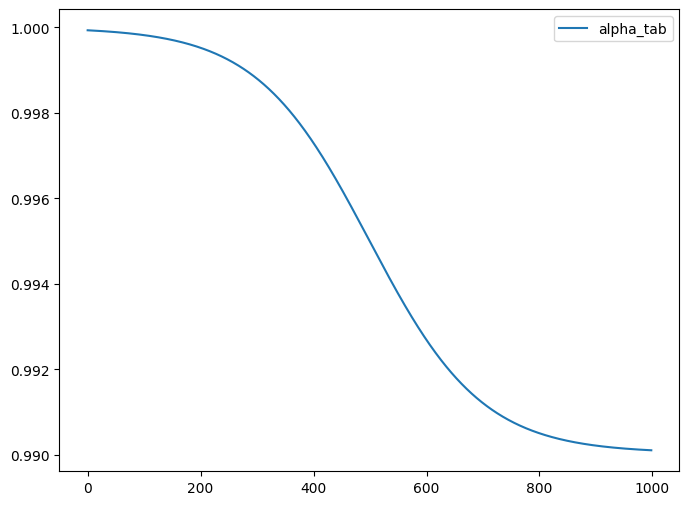

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_tab, label="alpha_tab")
plt.legend()
plt.show()

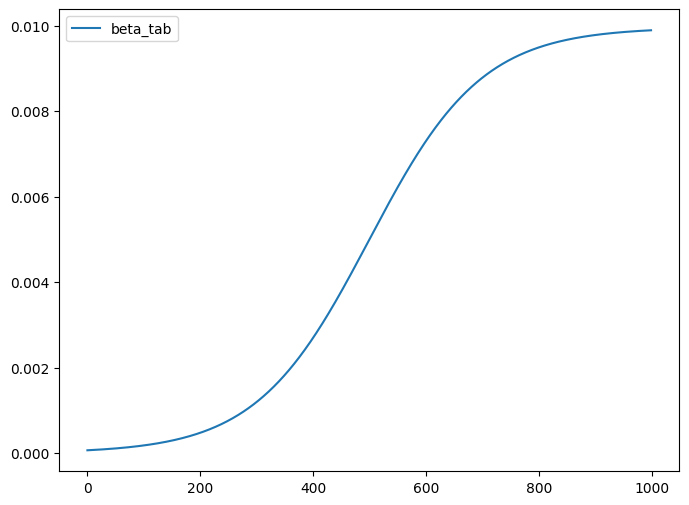

In [98]:
# plot beta_tab
plt.figure(figsize=(8, 6))
plt.plot(beta_tab, label="beta_tab")
plt.legend()
plt.show()

In [99]:
data_t = [pd.DataFrame() for _ in range(T)]
data_t[0] = data
for t in range(1, T):
    data_t[t] = pd.DataFrame({
        0: np.random.normal(np.sqrt(alpha2_tab[t]) * x, (1 - alpha2_tab[t])),
        1: np.random.normal(np.sqrt(alpha2_tab[t]) * y, (1 - alpha2_tab[t]))
    })


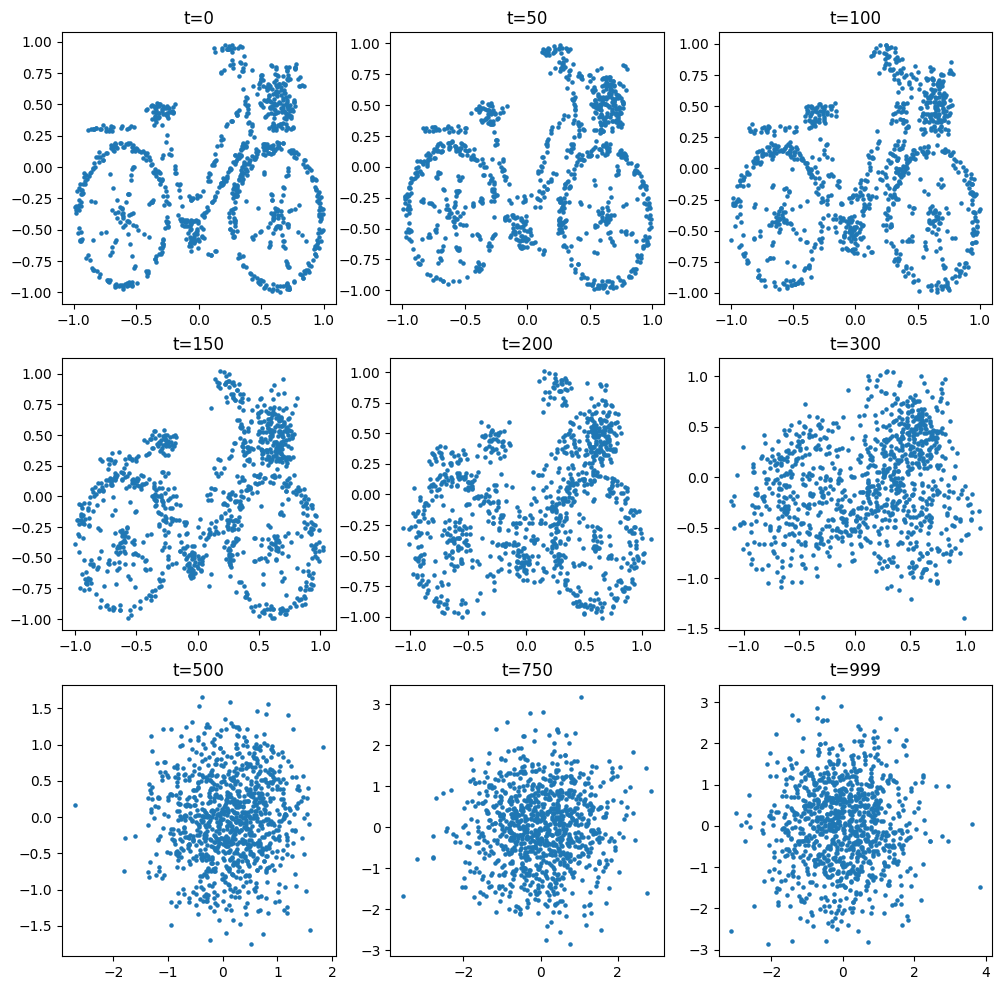

In [100]:
t_values = [0, 50, 100, 150, 200, 300, 500, 750, 999]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(t_values):
            t = t_values[idx]
            data_xd = data_t[t].sample(1000)
            axes[i, j].scatter(data_xd[0], data_xd[1], s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')
plt.show()

In [101]:
import torch
import torch.nn as nn

In [102]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [191]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conditional_layer1 = nn.Linear(2, 128)
        self.conditional_layer2 = nn.Linear(128, 128)
        self.conditional_layer3 = nn.Linear(128, 128)
        self.conditional_layer4 = nn.Linear(128, 2)
        self.relu = nn.ReLU()
        
        self.sin_emb_layer11 = nn.Linear(50, 128)
        self.sin_emb_layer12 = nn.Linear(128, 128)
        
        self.sin_emb_layer21 = nn.Linear(50, 128)
        self.sin_emb_layer22 = nn.Linear(128, 128)
        
        self.sin_emb_layer31 = nn.Linear(50, 128)
        self.sin_emb_layer32 = nn.Linear(128, 128)
        
        self.sin_emb_layer41 = nn.Linear(50, 128)
        self.sin_emb_layer42 = nn.Linear(128, 128)
        
    def positional_encoding(self, t):
        pe = torch.zeros(50).to(device)
        div_term = torch.exp(-math.log(10000.0) * torch.arange(0, 50, 2).float() / 50)
        pe[0::2] = torch.sin(t * div_term) 
        pe[1::2] = torch.cos(t * div_term) 
        return pe
    
    def forward(self, x, t):
        x = self.conditional_layer1(x)
        pe = self.positional_encoding(t)
        pe = self.relu(self.sin_emb_layer11(pe))
        pe = self.sin_emb_layer12(pe)
        x = x + pe
        x = self.relu(x)
        
        x = self.conditional_layer2(x)
        pe = self.positional_encoding(t)
        pe = self.relu(self.sin_emb_layer21(pe))
        pe = self.sin_emb_layer22(pe)
        x = x + pe
        x = self.relu(x)
        
        x = self.conditional_layer3(x)
        pe = self.positional_encoding(t)
        pe = self.relu(self.sin_emb_layer31(pe))
        pe = self.sin_emb_layer32(pe)
        x = x + pe
        x = self.relu(x)
        
        x = self.conditional_layer4(x)
        
        return x

In [192]:
net = NeuralNetwork().to(device)

In [193]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.0001)
criterion = nn.MSELoss()
batch_size = 64

In [194]:
data_test = torch.randn(batch_size, 2).to(device)
t = 10
t = torch.tensor(t, dtype=torch.float32)

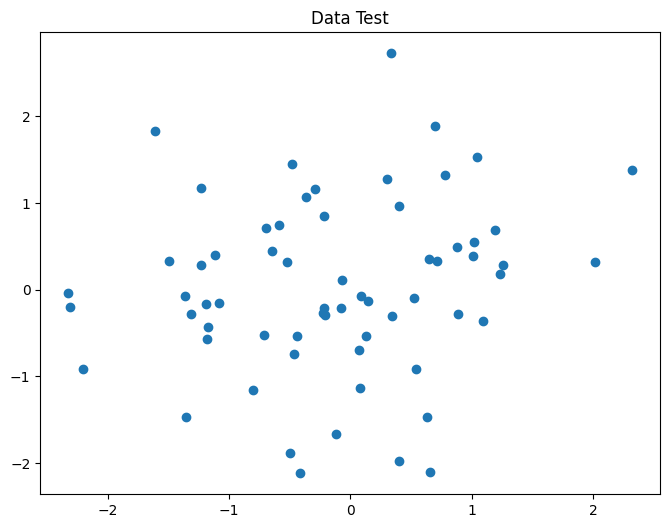

In [195]:
plt.figure(figsize=(8, 6))
plt.scatter(data_test[:, 0].cpu().detach().numpy(), data_test[:, 1].cpu().detach().numpy())
plt.title("Data Test")
plt.show()

In [196]:
output = net(data_test, t)

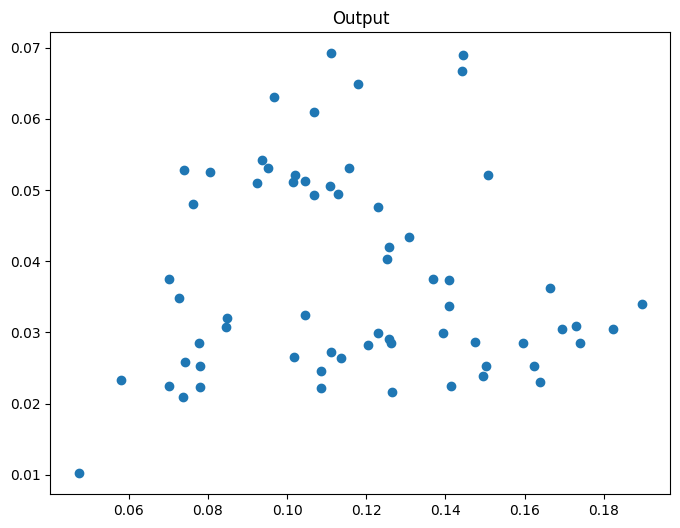

In [197]:
plt.figure(figsize=(8, 6))
plt.scatter(output[:, 0].cpu().detach().numpy(), output[:, 1].cpu().detach().numpy())
plt.title("Output")
plt.show()


In [198]:
epochs = 1000
T = 1000
# alpha2_tab = torch.tensor(alpha2_tab, dtype=torch.float32).to(device)

In [206]:
net_tab = []
losses = []
epochs_losses = []

In [210]:
def plot_losses(losses):
    plt.figure(figsize=(8, 6))
    plt.plot(losses)
    plt.title("Losses")
    plt.show()
    

In [ ]:
for i in range(epochs):
    for j in range(len(data) // batch_size):
        eps = torch.randn(batch_size, 2).to(device)
        data_train = torch.tensor(data.sample(batch_size).to_numpy(), dtype=torch.float32).to(device)  # treningowe niezaszumione
        t = torch.randint(1, T, (1,))
        noisy_points = data_train * torch.sqrt(alpha2_tab[t]) + eps * torch.sqrt(1 - alpha2_tab[t])
        
        optimizer.zero_grad()
        output = net(noisy_points, t)
        loss = criterion(output, eps)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        
        
    avg_running_loss = np.mean(losses[-(len(data) // batch_size):])
    epochs_losses.append(avg_running_loss)
    print(f"Epoch: {i}, Loss: {avg_running_loss}")
    
    if i % 10 == 9:
        net_tab.append(deepcopy(net))
        plot_losses(epochs_losses)
        
plot_losses(epochs_losses)

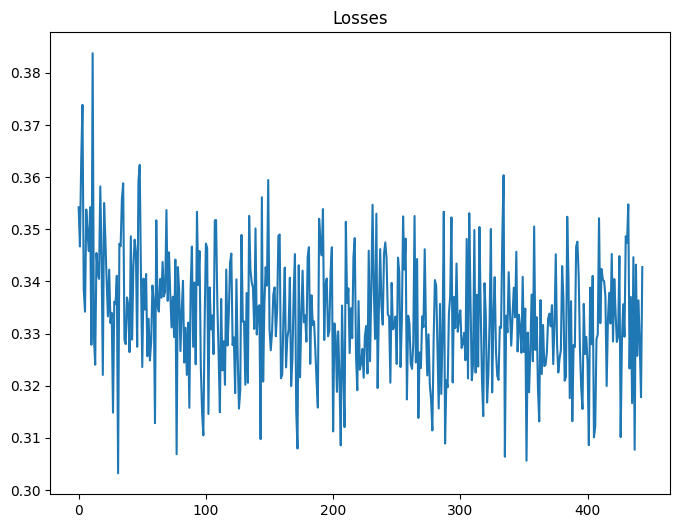

In [254]:
plot_losses(epochs_losses)

In [268]:
n_points = 1000
points_tab = [None for _ in range(T)]
model = net_tab[1]

In [269]:
random_points = torch.randn(n_points, 2).to(device)
points_tab[-1] = random_points
model.eval()
for t in range(T-2, -1, -1):
    z = torch.zeros_like(random_points)
    if t > 1:
        z = torch.randn_like(random_points)
        
    alpha_t = torch.tensor(alpha_tab[t], dtype=torch.float32).to(device)
    beta_t = torch.tensor(beta_tab[t], dtype=torch.float32).to(device)
    random_points = ((1 / torch.sqrt(alpha_t)) * 
                     (random_points - (1 - alpha_tab[t]) / torch.sqrt(1 - alpha2_tab[t]) * net(random_points, t)) 
                     + torch.sqrt(beta_t) * z)
    points_tab[t] = random_points

model.train();

In [247]:
idx_values = [0, 50, 100, 150, 200, 300, 500, 750, 999]

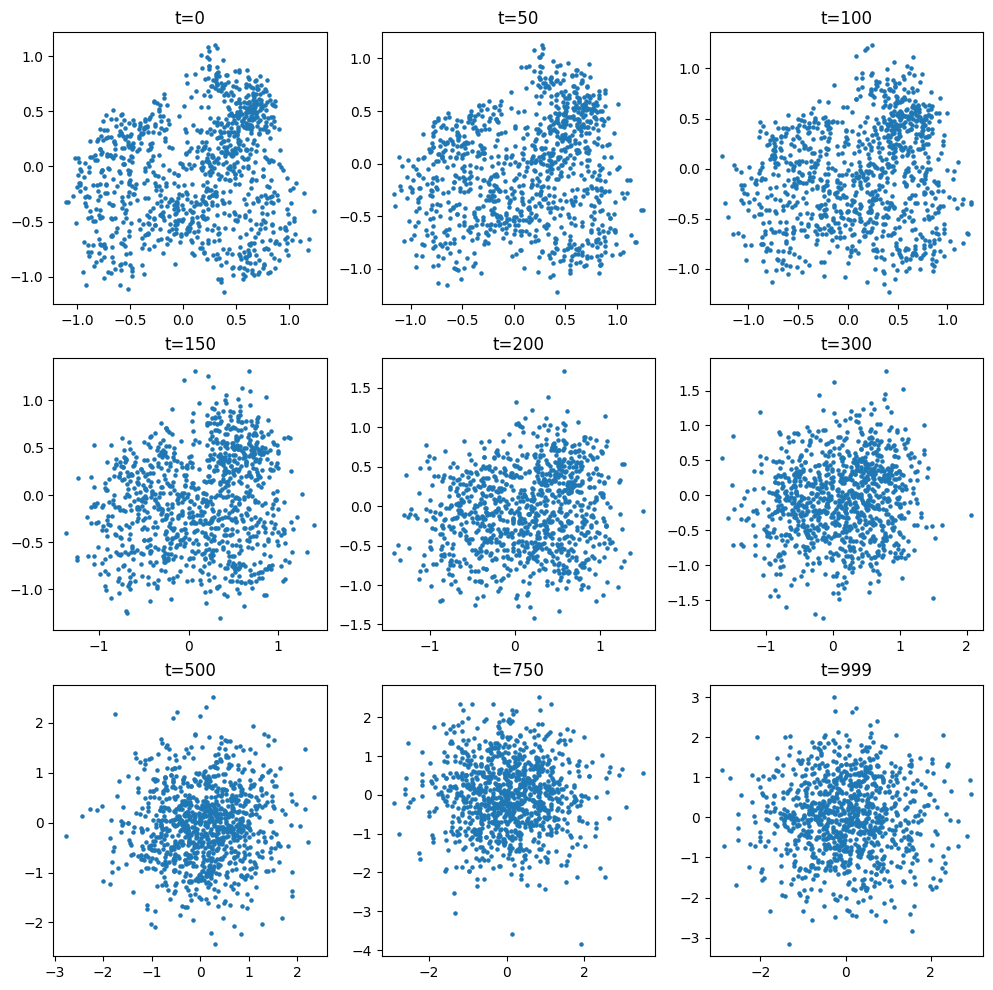

In [242]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(idx_values):
            t = idx_values[idx]
            axes[i, j].scatter(points_tab[t][:, 0].cpu().detach().numpy(), points_tab[t][:, 1].cpu().detach().numpy(), s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')

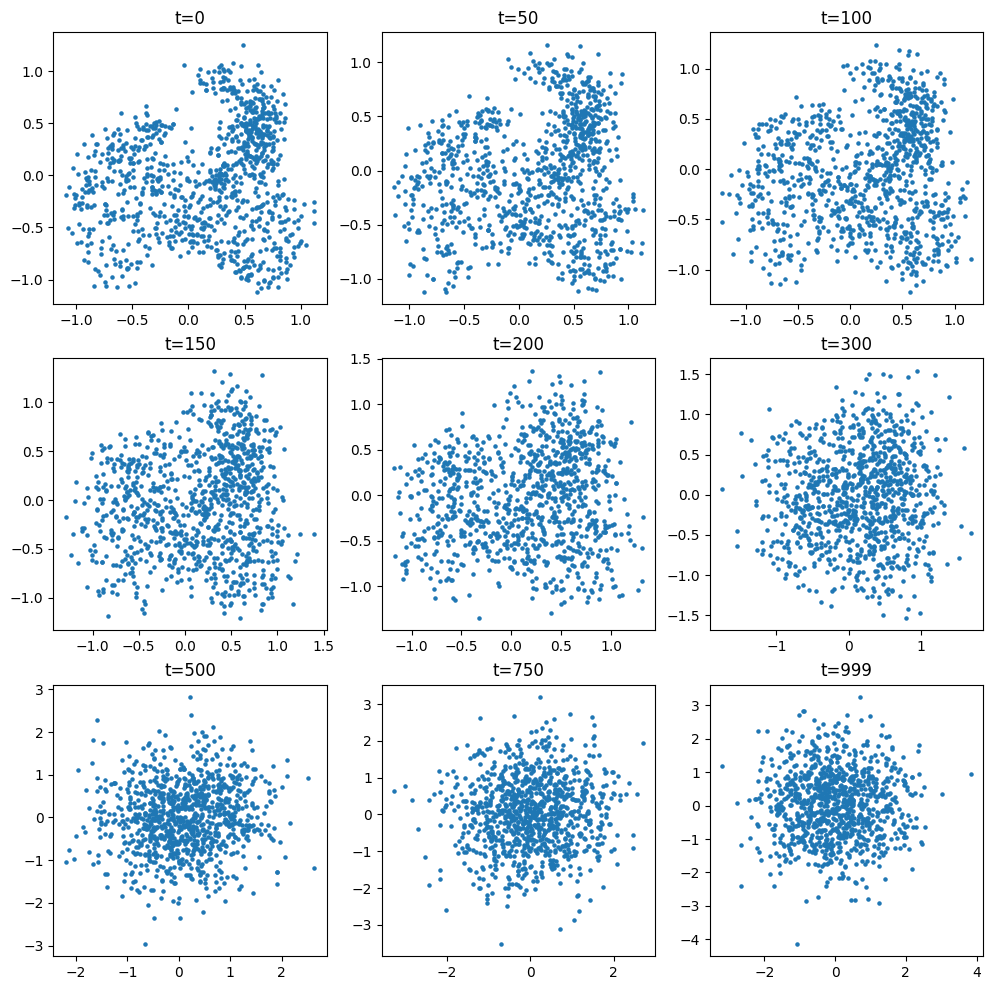

In [248]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(idx_values):
            t = idx_values[idx]
            axes[i, j].scatter(points_tab[t][:, 0].cpu().detach().numpy(), points_tab[t][:, 1].cpu().detach().numpy(), s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')

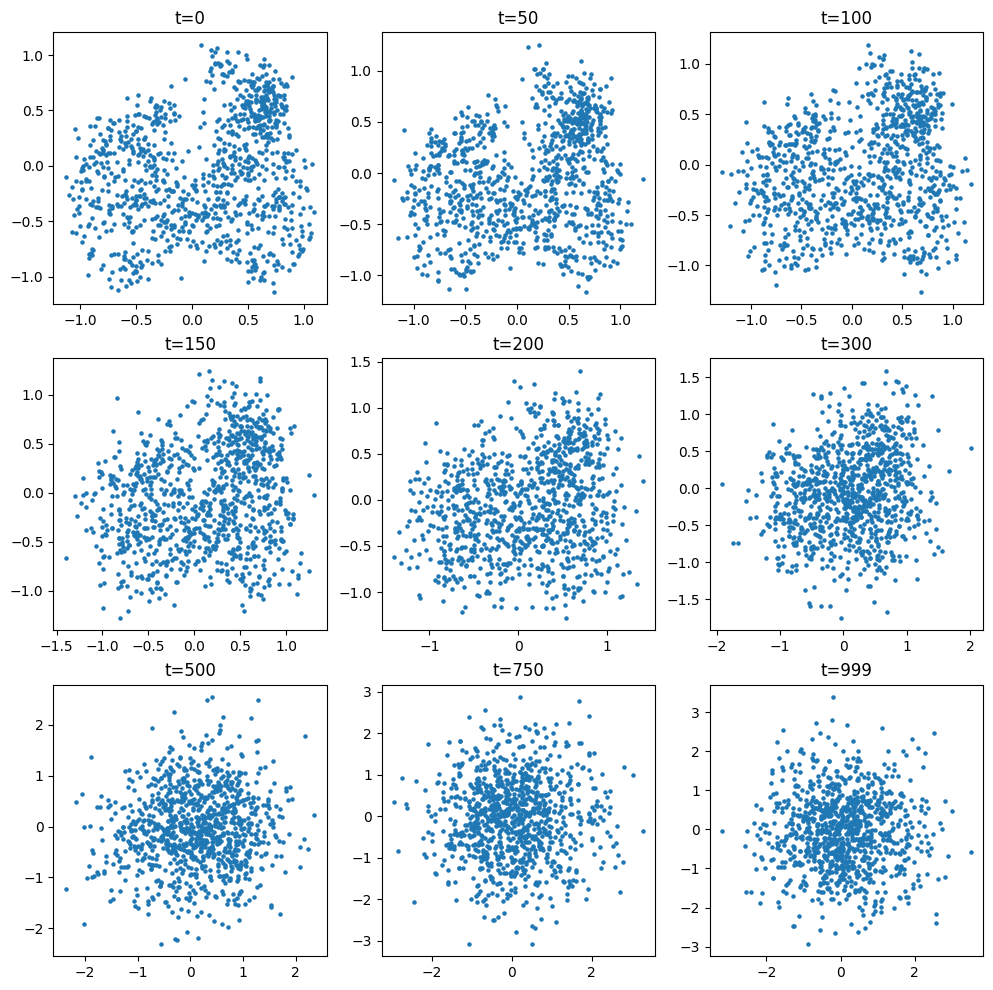

In [253]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(idx_values):
            t = idx_values[idx]
            axes[i, j].scatter(points_tab[t][:, 0].cpu().detach().numpy(), points_tab[t][:, 1].cpu().detach().numpy(), s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')

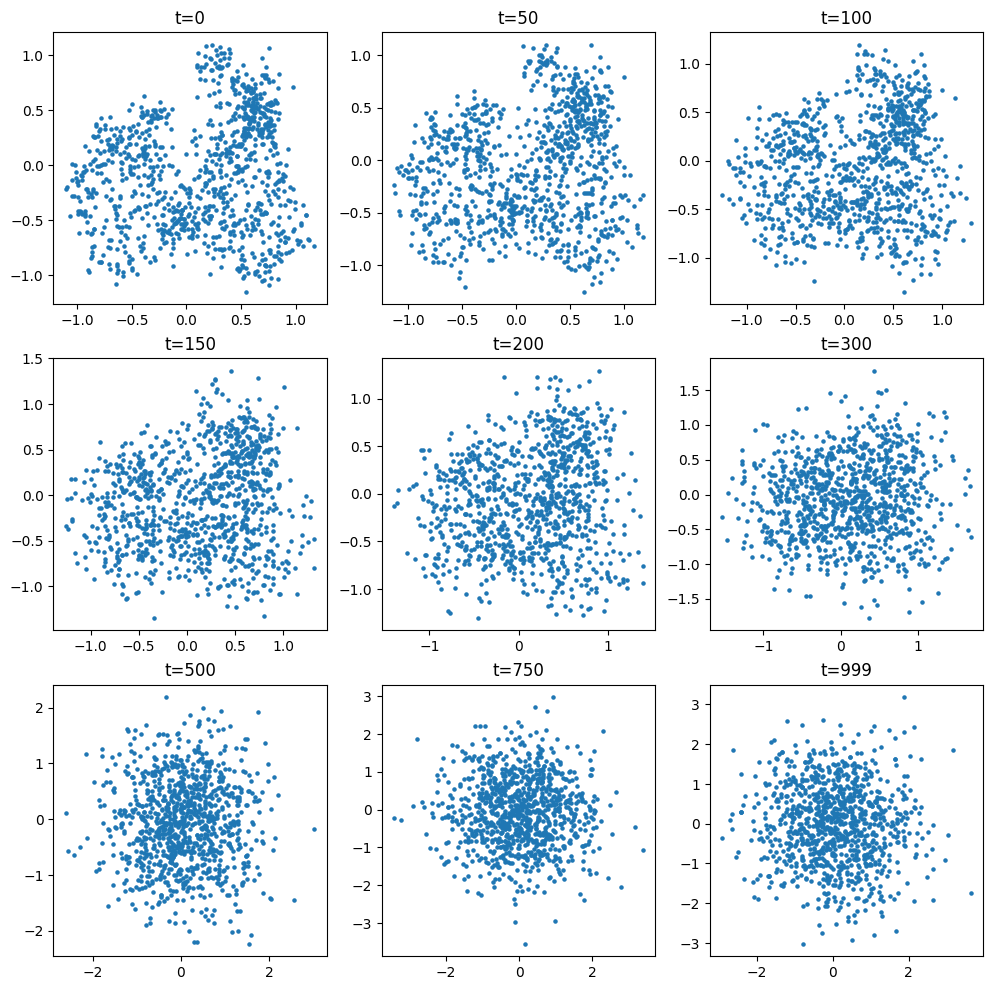

In [270]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i in range(3):
    for j in range(3):
        idx = i * 3 + j
        if idx < len(idx_values):
            t = idx_values[idx]
            axes[i, j].scatter(points_tab[t][:, 0].cpu().detach().numpy(), points_tab[t][:, 1].cpu().detach().numpy(), s=5)
            axes[i, j].set_title(f"t={t}")
        else:
            axes[i, j].axis('off')